# PR3C Interno

Kinoshita & Nakai (1999) nos dicen que, así como para el caso de planeta circunbinario (planeta externo, perturbador interno) en el que Ziglin (1975) mostraba resonancias con gráficos de $\Omega$ vs $i$, en el caso del perturbador externo (planeta interno) también existen resonancias que se pueden ver con gráficos de $\omega$ vs $e$.

En este notebook intentamos producir esos gráficos, como los que se muestran en la Fig. 1 del paper, de dos maneras: empírica (evolucionando particulas) y con curvas de igual F.

In [3]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

pi = -4*np.arctan(-1)

### PARÁMETROS

In [4]:
N = 30                        # i

e_ini = 0.                    # extremos
e_fin = .95                    # en a

w1 = 0
w2 = 90.*pi/180.

Jz = 0.4


e1 = 0.                       # e de binaria

m0 = 1                        # masa de estrella primaria
m1 = 1e-3                     # masa de estrella secundaria
m2 = 0.                       # masa del planeta

a1 = 5.2                      # semieje entre estrellas
a2 = 3.1

# INTEGRACIÓN #1
## Cond. iniciales: 
### e -> [0,1]
### w = 0

In [19]:
p=0
N_l = []
for e_ind in range(N):
        
        e_i = (e_ind/(N-1))*(e_fin-e_ini) + e_ini      # e : 0.1 -> 0.3
        i_ini = np.arccos(Jz/np.sqrt(1 - e_i**2))
        
        if i_ini != i_ini:
            break
        
        sim = rebound.Simulation()

        sim.add(m=m0)                                           # primaria
        sim.add(m=m2,a=a2,e=e_i,inc=i_ini,omega=w1,Omega=0)                            # particula
        sim.add(m=m1,a=a1,e=e1,inc=0,l=0,Omega=0,pomega=0)    # secundaria
        

        
        # ---------------------- integramos

        os = sim.calculate_orbits()
        sim.integrator = "whfast" 
        
        sim.ri_whfast.safemode = 0
        sim.ri_whfast.corrector = 11
        
        sim.dt = 0.05 * os[0].P  # dt = 5% del periodo de la orbita mas chica
        Nout = 300               # number of points to display
        tmax = 1000*365.25          # integrar por 2 yr
        Nmoons = 2

        ecc = np.zeros((Nmoons,Nout))

        times = np.linspace(0.,tmax,Nout)
        ps = sim.particles
        elem = np.zeros((Nout,7))
        
#         print(e_i,'     ',i_ini*180/pi,'     ',np.sqrt(1 - e_i**2)*np.cos(i_ini))
        for i,time in enumerate(times):
            
            sim.integrate(time)
            os = sim.calculate_orbits()
            
            Om0 = os[0].Omega*180/pi
#             Inc0 = os[1].inc*180/pi
            
            if Om0 < 0:
                Om0 = Om0 + 180                
            
            if (os[0].e > 1):
                break
            
            elem[i] = [time/365.25,os[0].a,os[0].e,os[0].inc*180/pi,os[0].l*180/pi,os[0].omega*180/pi,Om0]
        
        perc = np.round((e_ind/(N-1))*100,decimals=1)   #  porcentaje de progreso del programa
        print(str(perc)+'%',end='\r')                   #
        
        N_l.append(e_ind)
        
        if (os[0].e > 1):
            open('e'+str(e_ind)+'.txt', 'w').close()
            continue
        
        sim.save("checkpoint.bin")

#         f.append([a_ind,e_ind,np.max(ecc[1]),a_i,e_i])
        open('e'+str(e_ind)+'.txt', 'w').close()
        np.savetxt('e'+str(e_ind)+'.txt',elem)

open('N_l.txt', 'w')
np.savetxt('N_l.txt',N_l)        

print(str('100%'),end='\r')

/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: genfromtxt: Empty input file: "e21.txt"
  """
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: genfromtxt: Empty input file: "e21.txt"
  
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: genfromtxt: Empty input file: "e21.txt"
  import sys
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: genfromtxt: Empty input file: "e25.txt"
  """
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: genfromtxt: Empty input file: "e25.txt"
  
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: genfromtxt: Empty input file: "e25.txt"
  import sys
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_la

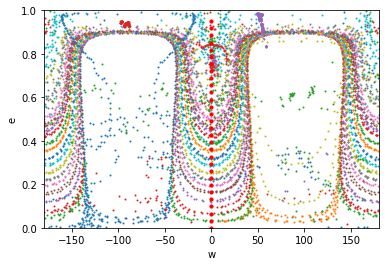

In [22]:
N_l = np.genfromtxt('N_l.txt',usecols=[0])
N_l = [int(i) for i in N_l]

for i in N_l:
    e_l = np.genfromtxt('e'+str(i)+'.txt',usecols=[2])
    w_l = np.genfromtxt('e'+str(i)+'.txt',usecols=[5])
    t_l = np.genfromtxt('e'+str(i)+'.txt',usecols=[0])
    plt.scatter(w_l,e_l,s=1)

for e_ind in range(N):
        e_i = ((e_ind/(N-1))*(e_fin-e_ini) + e_ini)
        plt.scatter(w1,e_i,s=10,color='red')

plt.xlabel('w')
plt.ylabel('e')

plt.xlim(-180,180)
plt.ylim(0,1)
        
plt.show()

# INTEGRACIÓN #2
## Cond. iniciales: 
### e -> [0,1]
### w = 90

In [23]:
p=0
N_l2 = []
for e_ind in range(N):
        
        e_i = (e_ind/(N-1))*(e_fin-e_ini) + e_ini      # e : 0.1 -> 0.3
        i_ini = np.arccos(Jz/np.sqrt(1 - e_i**2))

        if i_ini != i_ini:
            break
        
        sim = rebound.Simulation()

        sim.add(m=m0)                                           # primaria
        sim.add(m=m2,a=a2,e=e_i,inc=i_ini,omega=w2,Omega=0)                            # particula
        sim.add(m=m1,a=a1,e=e1,inc=0,l=0,Omega=0,pomega=0)    # secundaria
        

        
        # ---------------------- integramos

        os = sim.calculate_orbits()
        sim.integrator = "whfast" 
        
        sim.ri_whfast.safemode = 0
        sim.ri_whfast.corrector = 11
        
        sim.dt = 0.05 * os[0].P  # dt = 5% del periodo de la orbita mas chica
        Nout = 300               # number of points to display
        tmax = 1000*365.25          # integrar por 2 yr
        Nmoons = 2

        ecc = np.zeros((Nmoons,Nout))

        times = np.linspace(0.,tmax,Nout)
        ps = sim.particles
        elem = np.zeros((Nout,7))
        
#         print(e_i,'     ',i_ini*180/pi,'     ',np.sqrt(1 - e_i**2)*np.cos(i_ini))
        for i,time in enumerate(times):
            
            sim.integrate(time)
            os = sim.calculate_orbits()
            
            Om0 = os[0].Omega*180/pi
#             Inc0 = os[1].inc*180/pi
            
            if Om0 < 0:
                Om0 = Om0 + 180                
            
            if (os[0].e > 1):
                break
            
            elem[i] = [time/365.25,os[0].a,os[0].e,os[0].inc*180/pi,os[0].l*180/pi,os[0].omega*180/pi,Om0]
        
        perc = np.round((e_ind/(N-1))*100,decimals=1)   #  porcentaje de progreso del programa
        print(str(perc)+'%',end='\r')                   #
        
        N_l2.append(e_ind)
        
        if (os[0].e > 1):
            open('e'+str(e_ind)+'b.txt', 'w').close()
            continue
        
        sim.save("checkpoint.bin")

#         f.append([a_ind,e_ind,np.max(ecc[1]),a_i,e_i])
        open('e'+str(e_ind)+'b.txt', 'w').close()
        np.savetxt('e'+str(e_ind)+'b.txt',elem)

        
open('N_l2.txt', 'w')
np.savetxt('N_l2.txt',N_l2)

print(str('100%'),end='\r')

/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  


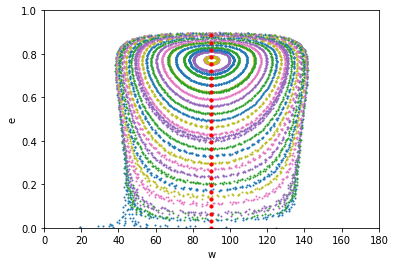

In [82]:
N_l2 = np.genfromtxt('N_l2.txt',usecols=[0])
N_l2 = [int(i) for i in N_l2]

for i in N_l2:
    e_l = np.genfromtxt('e'+str(i)+'b.txt',usecols=[2])
    w_l = np.genfromtxt('e'+str(i)+'b.txt',usecols=[5])
    t_l = np.genfromtxt('e'+str(i)+'b.txt',usecols=[0])
    plt.scatter(w_l,e_l,s=1)

for e_ind in N_l2:
        e_i = ((e_ind/(N-1))*(e_fin-e_ini) + e_ini)
        plt.scatter(w2*180/pi,e_i,s=10,color='red')

plt.xlabel('w')
plt.ylabel('e')

plt.xlim(0,180)
plt.ylim(0,1)
        
plt.show()

# CURVAS DE IGUAL HAMILTONIANO

In [10]:
def Hk(e,w,a,J):
    inc = np.arccos(J/(np.sqrt(1- e**2)))
    H_f = (2+3*e*e)*(3*(np.cos(inc)**2) - 1) + 15*e*e*np.cos(2*w)*(np.sin(inc)**2)
    return(H_f)

In [11]:
N_H = 200

e_ll = np.linspace(0,1,N_H)
w_ll = np.linspace(-180*np.pi/180,180*np.pi/180,N_H)

In [28]:
Hk_l = np.zeros((N_H,N_H))
for j,e_j in enumerate(e_ll):
    for k,w_k in enumerate(w_ll):
        Hk_l[j,k] = Hk(e_j,w_k,a2,Jz)

/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


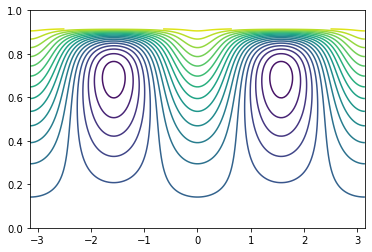

In [29]:
plt.contour(w_ll,e_ll,Hk_l,20)

## Combinando gráficos

/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: genfromtxt: Empty input file: "e21.txt"
  
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: genfromtxt: Empty input file: "e21.txt"
  This is separate from the ipykernel package so we can avoid doing imports until
/home/administrador/anaconda2/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: genfromtxt: Empty input file: "e21.txt"
  after removing the cwd from sys.path.


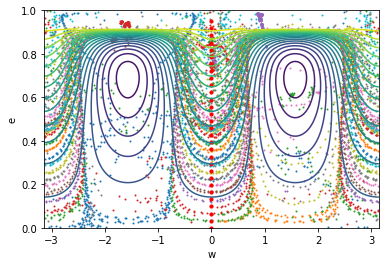

In [54]:
for i in range(N):
    e_l = np.genfromtxt('e'+str(i)+'.txt',usecols=[2])
    w_l = np.genfromtxt('e'+str(i)+'.txt',usecols=[5])
    t_l = np.genfromtxt('e'+str(i)+'.txt',usecols=[0])
    plt.scatter(w_l*pi/180,e_l,s=1)

for e_ind in range(N):
        e_i = ((e_ind/(N-1))*(e_fin-e_ini) + e_ini)
        plt.scatter(w1,e_i,s=10,color='red')

plt.xlabel('w')
plt.ylabel('e')

plt.xlim(-np.pi,np.pi)
plt.ylim(0,1)

plt.contour(w_ll,e_ll,Hk_l,20)

plt.show()

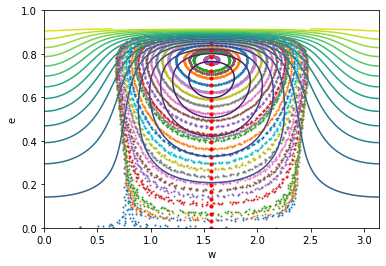

In [30]:
for i in N_l:
    e_l = np.genfromtxt('e'+str(i)+'b.txt',usecols=[2])
    w_l = np.genfromtxt('e'+str(i)+'b.txt',usecols=[5])
    t_l = np.genfromtxt('e'+str(i)+'b.txt',usecols=[0])
    plt.scatter(w_l*pi/180,e_l,s=1)

for e_ind in N_l:
        e_i = ((e_ind/(N-1))*(e_fin-e_ini) + e_ini)
        plt.scatter(w2,e_i,s=10,color='red')

plt.xlabel('w')
plt.ylabel('e')

plt.xlim(0,pi)
plt.ylim(0,1)

plt.contour(w_ll,e_ll,Hk_l,20)

plt.show()